In [1]:
import pandas as pd
import numpy as np
import seaborn as sns   
import matplotlib.pyplot as plt


sample = pd.read_csv("../input/sample.csv")
test = pd.read_csv("../input/test.csv")
train = pd.read_csv("../input/train.csv")

In [2]:
# Lets have a look at the data and its shape

train.head()

,Id,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,0,738.023171,1764.052346,400.157208,978.737984,2240.893199,1867.557990,-977.277880,950.088418,-151.357208,-103.218852,410.598502
1,1,400.646015,144.043571,1454.273507,761.037725,121.675016,443.863233,333.674327,1494.079073,-205.158264,313.067702,-854.095739
2,2,189.900156,-2552.989816,653.618595,864.436199,-742.165020,2269.754624,-1454.365675,45.758517,-187.183850,1532.779214,1469.358770
3,3,-78.399449,154.947426,378.162520,-887.785748,-1980.796468,-347.912149,156.348969,1230.290681,1202.379849,-387.326817,-302.302751
4,4,-547.373531,-1048.552965,-1420.017937,-1706.270191,1950.775395,-509.652182,-438.074302,-1252.795360,777.490356,-1613.897848,-212.740280


In [3]:
train.shape

(10000, 12)

In [4]:
test.head()

,Id,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,10000,-483.797492,1288.057065,-129.878712,-198.078388,-334.487592,-391.443186,-612.406176,-676.523964,1327.229655,-448.695446
1,10001,-316.407305,30.830556,-313.356726,-173.259184,-327.368719,944.368248,1122.017380,112.338731,1372.340221,2062.561842
2,10002,-2448.558997,-561.988408,355.098820,634.378170,-392.450091,-813.156399,-232.873263,246.801210,-562.413197,-841.602015
3,10003,-942.120025,945.373015,140.910705,1753.565841,-347.223685,-1489.493408,-508.035412,1992.650031,555.461973,-1696.076948
4,10004,1752.366157,-597.550816,-466.491398,-1094.792276,-645.424882,-202.154830,205.073469,-270.385827,-310.299496,362.212675


In [5]:
test.shape

(2000, 11)

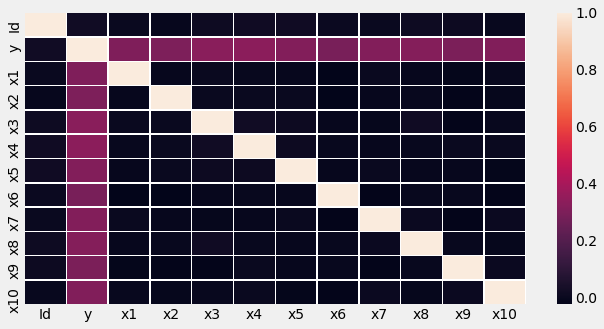

In [6]:
# Here, we want to see if there is any correlation in the data

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(10,5))         # Sample figsize in inches
sns.heatmap(train.corr(), linewidths=.5, ax=ax)
plt.show()

In [7]:
# Lets split our training data into features and target

X_train_feature_cols = train.columns.values[(train.columns.values != 'Id') & (train.columns.values != 'y')]
X_train = train[X_train_feature_cols]
y_train = train['y']

# Also with test data

X_test_feature_cols = test.columns.values[test.columns.values != 'Id']
X_test = test[X_test_feature_cols]


In [8]:
# We do a simple linear regression using sklearn 

from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train) # fitting the data
reg.score(X_train, y_train)  # How well do we fit 

1.0

In [9]:
# Coefficients 

reg.coef_

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [10]:
# to get the predicted y

y_pred = reg.predict(X_test)

In [11]:
X_test_get_Id = test.columns.values[test.columns.values == 'Id']
Id = test[X_test_get_Id]

In [12]:
Id = test.iloc[:, :1].values
Id = np.reshape(Id,(2000,))

In [13]:
# To write to a file 

df = pd.DataFrame({'Id':Id, 'y':y_pred})

df.to_csv(r'solution.csv', index = False)